# Customer Churn Classification

# 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Telco_Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.duplicated().sum() 

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.shape

(7043, 21)

In [9]:
data[data==" "].count()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0)
data['TotalCharges']= data['TotalCharges'].astype('float64')

In [11]:
data[data==0].count()

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

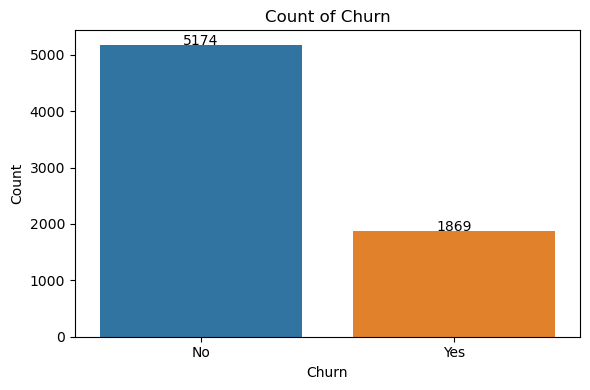

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.Churn)
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height, 
            int(height), 
            ha="center")
    
plt.show()

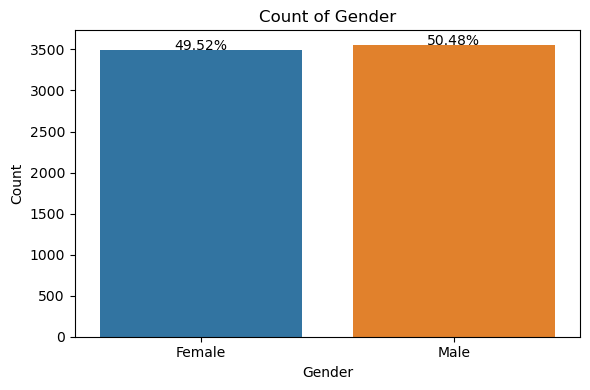

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.gender)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.show()

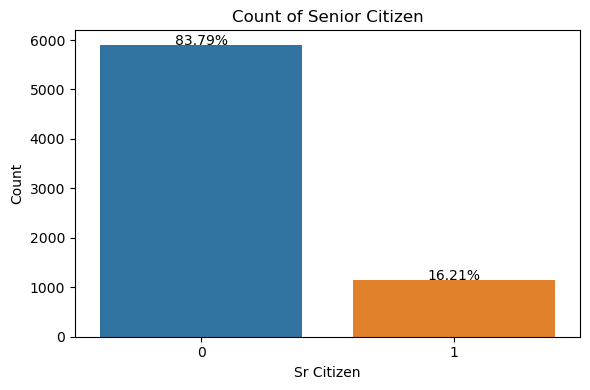

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.SeniorCitizen)
plt.title('Count of Senior Citizen')
plt.xlabel('Sr Citizen')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

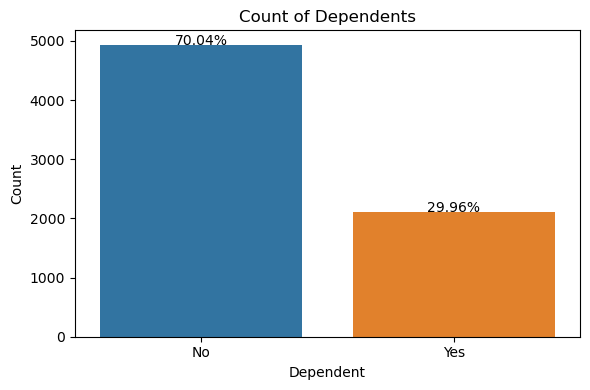

In [15]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.Dependents)
plt.title('Count of Dependents')
plt.xlabel('Dependent')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

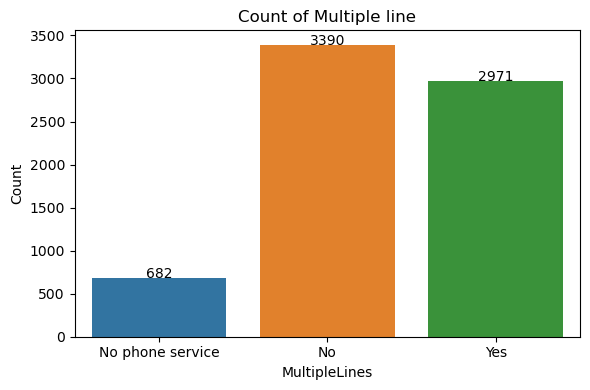

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.MultipleLines)
plt.title('Count of Multiple line')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

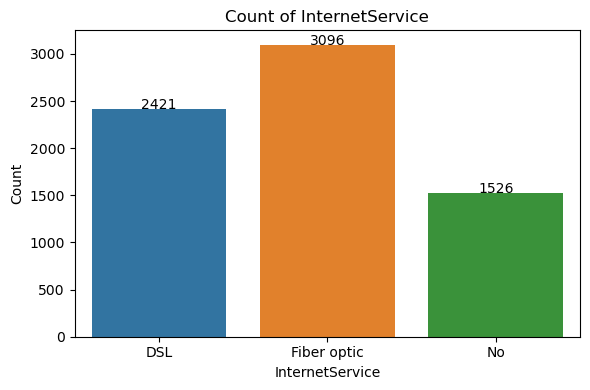

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.InternetService)
plt.title('Count of InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

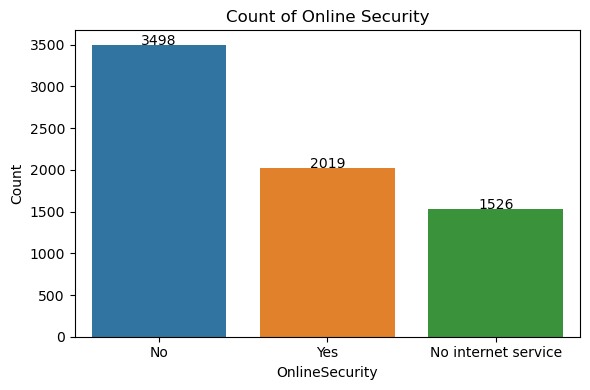

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.OnlineSecurity)
plt.title('Count of Online Security')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

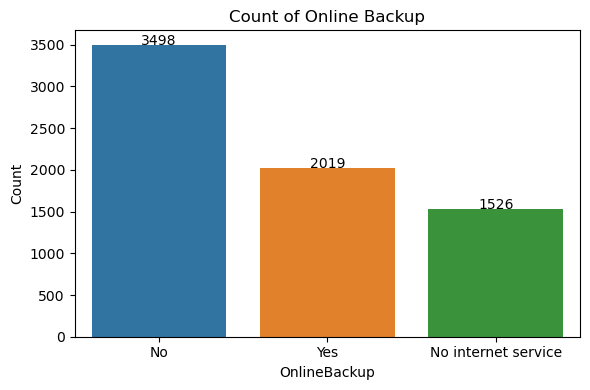

In [19]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.OnlineSecurity)
plt.title('Count of Online Backup')
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

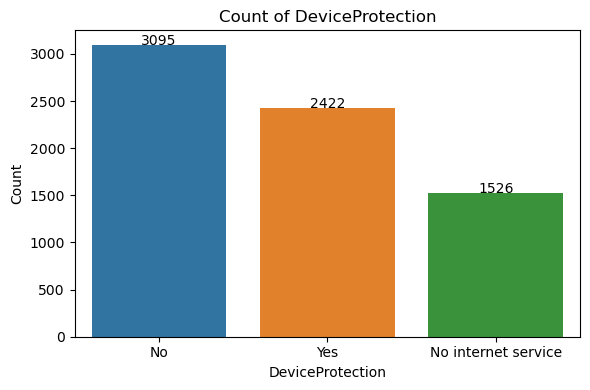

In [20]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.DeviceProtection)
plt.title('Count of DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

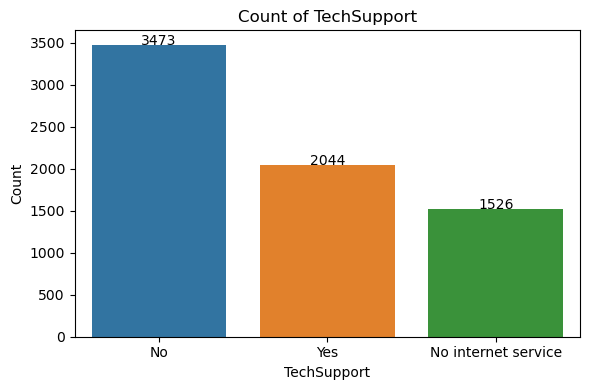

In [21]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.TechSupport)
plt.title('Count of TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

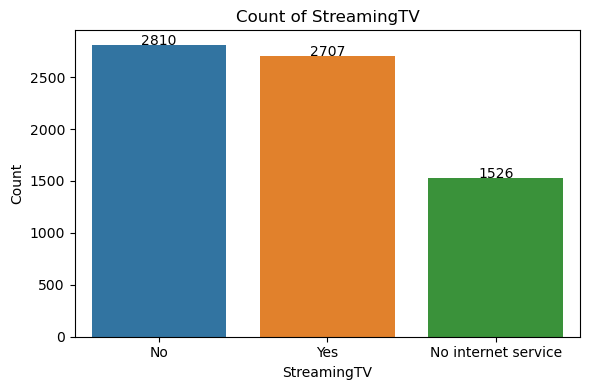

In [22]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.StreamingTV)
plt.title('Count of StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

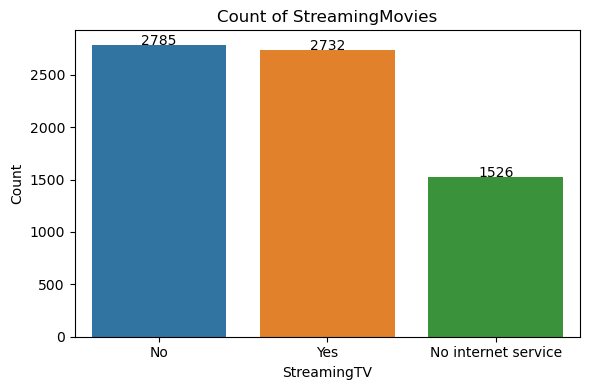

In [23]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.StreamingMovies)
plt.title('Count of StreamingMovies')
plt.xlabel('StreamingTV')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

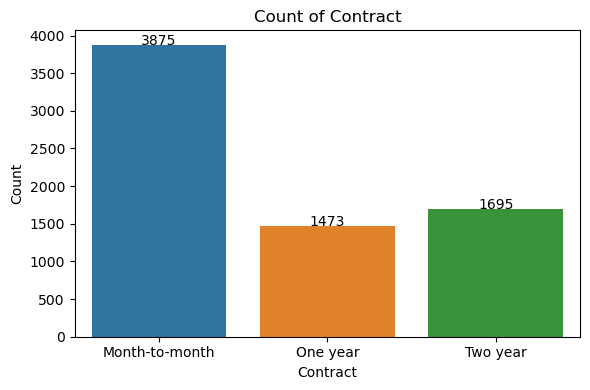

In [24]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=data.Contract)
plt.title('Count of Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

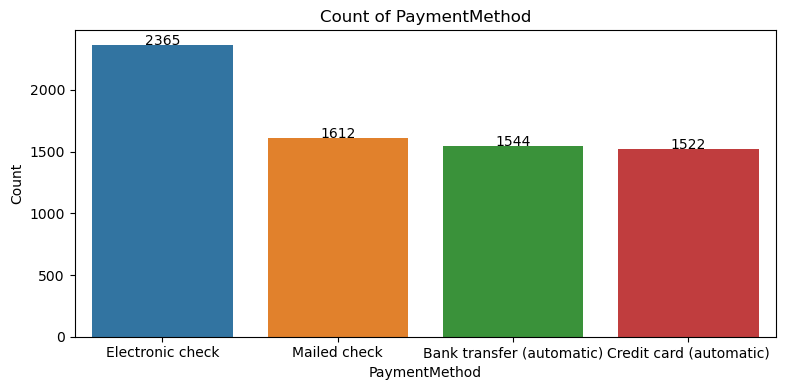

In [25]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=data.PaymentMethod)
plt.title('Count of PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.tight_layout()

total = float(len(data))  
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,  
            int(height),
            ha="center")

plt.show()

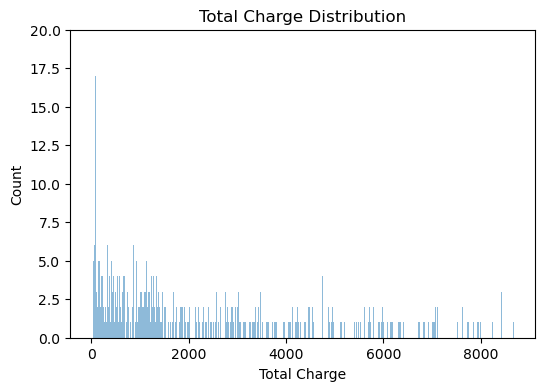

In [26]:
charge = data['TotalCharges']

plt.figure(figsize=(6,4))
plt.hist(charge, bins=len(charge), alpha=0.5)

plt.xlabel('Total Charge')
plt.ylabel('Count')
plt.title('Total Charge Distribution')
plt.ylim(0, 20)

plt.show()

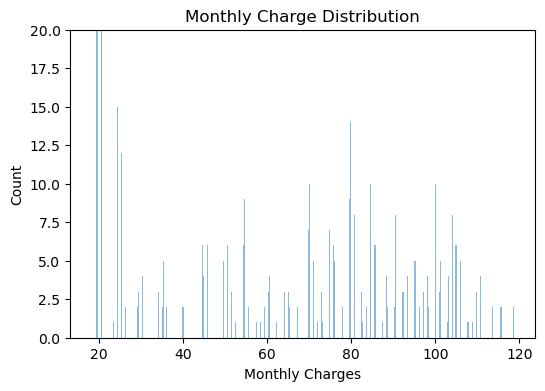

In [27]:
charge = data['MonthlyCharges']

plt.figure(figsize=(6,4))
plt.hist(charge, bins=len(charge), alpha=0.5)

plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charge Distribution')
plt.ylim(0, 20)

plt.show()

In [28]:
data[data['TotalCharges']==' '].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [8]:
len(data[(data['MonthlyCharges'] == data['TotalCharges'])])



613

In [9]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])


In [10]:
len(data[(data['MonthlyCharges'] == data['TotalCharges'])])


624

In [11]:
data['TotalCharges'].describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [12]:
data = data.replace(['No internet service', 'No phone service'], 'No')
data = data.replace(['DSL', 'Fiber optic'], 'Yes')

In [13]:
data = data.replace('No', 0)
data = data.replace('Yes', 1)

In [14]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

scaler = MinMaxScaler()
data[['TotalCharges', 'MonthlyCharges', 'tenure']] = scaler.fit_transform(data[['TotalCharges', 'MonthlyCharges', 'tenure']])

onehot_encoder = OneHotEncoder(sparse_output=False)
day_encoded = onehot_encoder.fit_transform(data[['gender','Contract','PaymentMethod']])
day_encoded_df = pd.DataFrame(day_encoded, columns=onehot_encoder.get_feature_names_out(['gender','Contract','PaymentMethod']))
data = pd.concat([data.drop(columns=['gender','Contract','PaymentMethod']), day_encoded_df], axis=1)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [17]:
data = data.drop('customerID', axis =1)

In [18]:
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,0,1,0,1,0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.472222,1,0,1,1,0,1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0.027778,1,0,1,1,1,0,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0.625000,0,0,1,1,0,1,...,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0.027778,1,0,1,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,1,1,0,1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,1,1,1.000000,1,1,1,0,1,1,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,1,1,0.152778,0,0,1,1,0,0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,0.055556,1,1,1,0,0,0,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
x = data.drop('Churn', axis = 1)
y = data['Churn']

In [33]:
from imblearn.over_sampling import SMOTE

x_smote, y_smote = SMOTE().fit_resample(x,y)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [89]:
def base_classification(x,y): 
    x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 42)

    
    models = {
        'GaussianNB': GaussianNB(),
        'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
        'SVC': SVC(random_state=42),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        results[model_name] = {'Confusion Matrix': cm, 'Accurary': accuracy_score(y_test, y_pred)}
    return results

In [90]:
base_classification(x,y)

{'GaussianNB': {'Confusion Matrix': array([[1133,  441],
         [ 303, 1228]]),
  'Accurary': 0.7603864734299517},
 'DecisionTreeClassifier': {'Confusion Matrix': array([[1200,  374],
         [ 361, 1170]]),
  'Accurary': 0.7632850241545893},
 'SVC': {'Confusion Matrix': array([[1209,  365],
         [ 293, 1238]]),
  'Accurary': 0.7880837359098228}}

In [37]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

In [88]:
def ensemble_classification(x,y): 
    x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 42)

    
    models = {
        'BaggingClassifier': BaggingClassifier(random_state=42),
        'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
        'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
        'RandomForestClassifier': RandomForestClassifier(random_state=42),
        'XGBClassifier': XGBClassifier(random_state=42),
        'XGBRFClassifier': XGBRFClassifier(random_state=42),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        results[model_name] = {'Confusion Matrix': cm, 'Accurary': accuracy_score(y_test, y_pred)}
    return results

In [91]:
ensemble_classification(x,y)

/Users/vanpan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'BaggingClassifier': {'Confusion Matrix': array([[1282,  292],
         [ 295, 1236]]),
  'Accurary': 0.8109500805152979},
 'AdaBoostClassifier': {'Confusion Matrix': array([[1174,  400],
         [ 247, 1284]]),
  'Accurary': 0.7916264090177134},
 'GradientBoostingClassifier': {'Confusion Matrix': array([[1208,  366],
         [ 238, 1293]]),
  'Accurary': 0.8054750402576489},
 'RandomForestClassifier': {'Confusion Matrix': array([[1275,  299],
         [ 222, 1309]]),
  'Accurary': 0.8322061191626409},
 'XGBClassifier': {'Confusion Matrix': array([[1268,  306],
         [ 232, 1299]]),
  'Accurary': 0.826731078904992},
 'XGBRFClassifier': {'Confusion Matrix': array([[1182,  392],
         [ 246, 1285]]),
  'Accurary': 0.794524959742351}}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 0)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10]
}

rf_classifier = RandomForestClassifier(random_state = 42)

random_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_dist, 
    n_iter=100,  
    cv=5, 
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = random_search.best_estimator_

accuracy = best_rf_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy: 0.8338164251207729


In [98]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': [1, 2, 4,6, 8, 10],
    'gamma': uniform(0, 0.5),
}

xgb_classifier = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5, 
    verbose=1,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf_model = random_search.best_estimator_

accuracy = best_rf_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.6488152939379115, 'gamma': 0.2475884550556351, 'learning_rate': 0.02031655633456552, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.672894435115225}
Accuracy: 0.8251207729468599


In [97]:
from sklearn.model_selection import cross_val_score

In [113]:
rfc2_cv = cross_val_score(RandomForestClassifier(), x_smote,y_smote, cv=5).round(2)
xgb2_cv = cross_val_score(XGBClassifier(), x_smote,y_smote, cv=5).round(2)

CV_table1 = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'XGBClassifier'],
    'Cross Val Score': [rfc2_cv, xgb2_cv],
    'Average CV score': [np.mean(rfc2_cv), np.mean(xgb2_cv)],
    'Stdev CV score': [np.std(rfc2_cv), np.std(xgb2_cv)]
})

CV_table1

,Model,Cross Val Score,Average CV score,Stdev CV score
0,Random Forest Classifier,"[0.8, 0.81, 0.86, 0.86, 0.87]",0.840,0.028983
1,XGBClassifier,"[0.76, 0.78, 0.85, 0.87, 0.87]",0.826,0.046733


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = 0.3, random_state = 0)

rfc2 = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, 
                              max_features='sqrt', max_depth=20, random_state=42).fit(x_train, y_train)

y_pred = rfc2.predict(x_test)

accuracy_score(y_test, y_pred)

0.8338164251207729

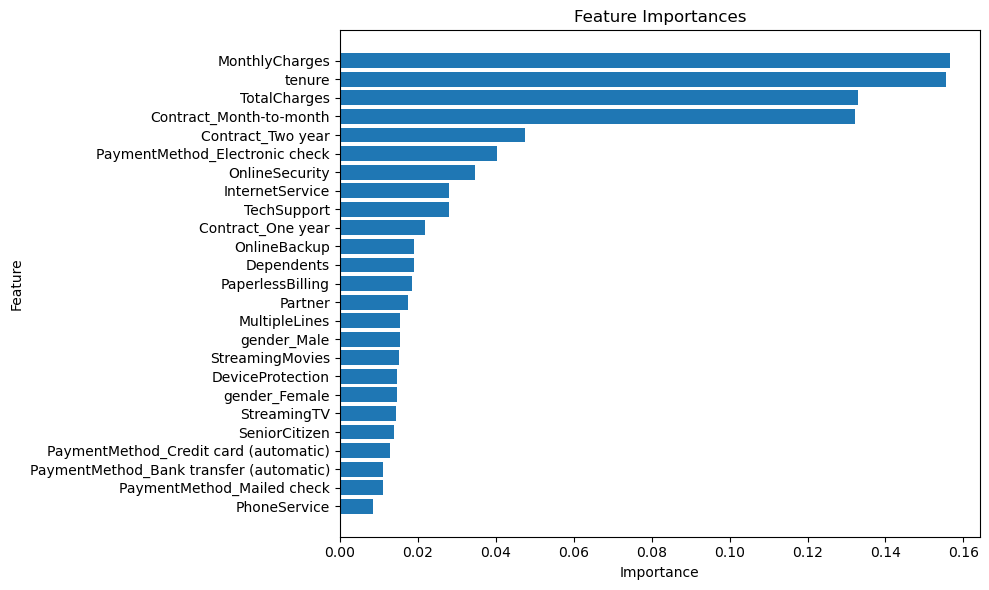

In [109]:
importances = rfc2.feature_importances_

feature_names = list(x.columns)

indices = np.argsort(importances)[::1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(x.shape[1]), importances[indices], align="center")
plt.yticks(range(x.shape[1]), [feature_names[i] for i in indices])  # Rotate 90 degrees
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

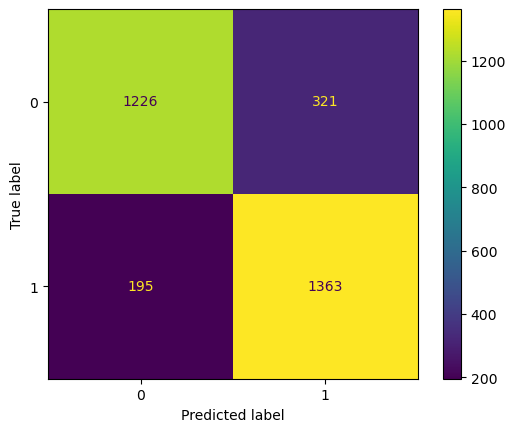

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rfc2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc2.classes_)
disp.plot()

plt.show()